<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Евгений! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на "ты" 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на "вы". 

Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).


Вижу, что ты очень старался, делая проект. Все ключевые этапы в работе выполнены, и в целом с проектом ты справился. 
    
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Можно учесть эти комментарии при выполнении будущих заданий или доработать текущий проект (однако это не обязательно). 

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы "со звездочкой", которые помогут в будущем.

    
Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».
</div>

# Рекомендация тарифов

В нашем распоряжении данные звонков, сообщений и траффика с мобильных телефонов клиентов, которые перешли на тарифы "Смарт" или "Ультра" (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных уже сделана.

Цель исследования: построить модель с максимально большим значением *accuracy* (минимум 0.75) на тестовой выборке.



# Оглавление


1. [Знакомство с данными](#introduction)

   1.1. [Вывод](#subparagraph1)
 
 
2. [Разбивка данных на выборки](#paragraph2)

   2.1. [Вывод](#subparagraph2)
                     

3. [Исследование моделей](#paragraph3)

   3.1. [Вывод](#subparagraph3)
        

4. [Проверка моделей на тестовой выборке](#paragraph4)

   4.1. [Вывод](#subparagraph4)
        

5. [Проверка модели на адекватность](#paragraph5)

   5.1. [Вывод](#subparagraph5)
        
          
6. [Общий вывод](#paragraph6)    

## Откройте и изучите файл<a name="introduction"></a>

In [1]:
# импорт библиотек

import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
import numpy as np
import seaborn as sns
from sklearn.dummy import DummyClassifier

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [2]:
# чтение файла с разных источников

try:
    tariff = pd.read_csv('/datasets/users_behavior.csv')
except:
    tariff = pd.read_csv('C:/Users/Evgenii/Downloads/DS Yandex/Projects/users_behavior.csv')
tariff

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

In [3]:
# информация об отсутствии пропусков и типе данных
tariff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
# познакомимся с уникальными значениями столбцов и их количеством

for col in tariff.columns:
    print(f'Уникальные значения в столбце {col}: {sorted(tariff[col].astype(str).unique())[:500]}')
    print(f'Число уникальных в {col}: {tariff[col].nunique()}')
    print()

Уникальные значения в столбце calls: ['0.0', '1.0', '10.0', '100.0', '101.0', '102.0', '103.0', '104.0', '105.0', '106.0', '107.0', '108.0', '109.0', '11.0', '110.0', '111.0', '112.0', '113.0', '114.0', '115.0', '116.0', '117.0', '118.0', '119.0', '12.0', '120.0', '121.0', '122.0', '123.0', '124.0', '125.0', '126.0', '127.0', '128.0', '129.0', '13.0', '130.0', '131.0', '132.0', '133.0', '134.0', '136.0', '137.0', '138.0', '14.0', '140.0', '141.0', '142.0', '143.0', '144.0', '145.0', '146.0', '148.0', '15.0', '150.0', '151.0', '152.0', '153.0', '154.0', '155.0', '156.0', '157.0', '158.0', '159.0', '16.0', '160.0', '161.0', '162.0', '163.0', '164.0', '165.0', '167.0', '168.0', '169.0', '17.0', '171.0', '172.0', '173.0', '174.0', '176.0', '177.0', '178.0', '18.0', '180.0', '181.0', '182.0', '183.0', '184.0', '185.0', '188.0', '189.0', '19.0', '196.0', '198.0', '2.0', '20.0', '203.0', '21.0', '22.0', '23.0', '24.0', '244.0', '25.0', '26.0', '27.0', '28.0', '29.0', '3.0', '30.0', '31.0', '3

In [5]:
# изменим тип данных для столбцов, где значения - целые числа

tariff = tariff.astype({'calls': 'int', 'messages': 'int'})
tariff.dtypes

calls         int64
minutes     float64
messages      int64
mb_used     float64
is_ultra      int64
dtype: object

In [6]:
# вывод таблицы
tariff

,calls,minutes,messages,mb_used,is_ultra
0,40,311.90,83,19915.42,0
1,85,516.75,56,22696.96,0
2,77,467.66,86,21060.45,0
3,106,745.53,81,8437.39,1
4,66,418.74,1,14502.75,0
...,...,...,...,...,...
3209,122,910.98,20,35124.90,1
3210,25,190.36,0,3275.61,0
3211,97,634.44,70,13974.06,0
3212,64,462.32,90,31239.78,0


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Данные загружены и исследованы.</div>

### Вывод к первому разделу <a name="subparagraph1"></a>

*В данных мобильного оператора собрана информация о количестве звонков за определённый период, их суммарной продолжительности, количестве sms-сообщений и использованного интернет-траффика. В последней колонке указан тариф, которым пользуется абонент мобильной связи: "Смарт" (значение 0) или "Ультра" (значение 1).*

*В базу данных входит 3214 абонентов мобильной связи с полным охватом данных (без пропусков). На основании этих данных построим модель предсказания тарифа для тех клиентов, что ещё не перешли на "Смарт" или "Ультра".*


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

## Разбейте данные на выборки<a name="paragraph2"></a>

*Разобьём данные на 3 выборки: тренировочную (для обучения модели и подборки гиперпараметров), валидационную (для текущей проверки модели с целью выявления максимальной точности `'accuracy rate`') и тестовую (для финальной проверки модели). Соотношение: 60% данных в тренировочной выборке, 20% - в валидационной, 20% - в тестовой.*

In [7]:
# разбиваем объекты на признаки (данные по звонкам, сообщениям и траффику) и целевой признак (тип тарифа)
features = tariff.loc[:, 'calls': 'mb_used']
target = tariff['is_ultra']

# делим данные на тренировочную и валидационную+тестовую выборки
features_train, features_testval, target_train, target_testval = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)

In [8]:
# размер тренировочной выборки (признаки и целевой признак)

print(features_train.shape)
print(target_train.shape)

(1928, 4)
(1928,)


In [9]:
# пропорции классов целевого признака тренировочной выборки

target_train.value_counts(normalize=True)

0    0.693465
1    0.306535
Name: is_ultra, dtype: float64

In [10]:
# делим валидационную+тестовую выборки пополам

features_test, features_val, target_test, target_val = train_test_split(
    features_testval, target_testval, test_size=0.5, random_state=12345, stratify=target_testval)

In [11]:
# размер валидационной выборки (признаки и целевой признак)

print(features_val.shape)
print(target_val.shape)

(643, 4)
(643,)


In [12]:
# размер строк тестовой выборки (признаки и целевой признак)

print(features_test.shape)
print(target_test.shape)

(643, 4)
(643,)


In [13]:
# пропорции классов целевого признака тестовой выборки

target_test.value_counts(normalize=True)

0    0.693624
1    0.306376
Name: is_ultra, dtype: float64

In [14]:
# пропорции классов целевого признака валидационной выборки

target_val.value_counts(normalize=True)

0    0.693624
1    0.306376
Name: is_ultra, dtype: float64

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, корректно разделил данные на три выборки.
На будущее, обрати внимание на аргумент stratify функции train_test_split. Стратификация особенно важна, когда у нас мало данных и возможен дисбаланс классов в обучении / валидации / тесте.
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Рекомендую явно вывести размеры получившихся выборок (с использованием .shape и print), это поможет быстро оценить корректность разделения на выборки и уместится в одну строку.
    
А вот вывод первых пяти строк трейна, теста и валидации наоборот - не занимает мало места, но мало информативен.
</div>

<div style="background: #e0eaf3; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='black'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='black'>Дмитрий, приветствую! Благодарю за проверку проекта и содежательные советы. 
    <br />    
        Касаемо stratify, прочитал, поправил код, хотя в данном случае пропорции между классами и без этого параметра различаются несущественно. После stratify изменились гиперпараметры и немного повысилась точность всех моделей. 
    <br />    
        Размеры выборок также вывел на экран, убрав вывод конкретных строк выборок. Но я хотел удостовериться (когда выводил строки), что выборки перемешаны и признаки/целевой признак в соответствии друг с другом. </font>
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> ОК </div>

### Вывод ко второму разделу <a name="subparagraph2"></a>

*Данные мобильного оператора разделены на признаки (данные пользования телефоном) и целевой признак (тип тарифа) с разбиением на выборки:*

    - тренировочная (60% данных)
    - валидационная (20% данных)
    - тестовая (20% данных)
    
*Выборки сформированы путём произвольного выбора объектов из общей базы данных.*

## Исследуйте модели<a name="paragraph3"></a>

*Исследуем данные на трёх моделях: модели дерева решений, модели случайного леса и логистической регрессии. Подберём такие гиперпараметры для каждой модели, чтобы `'accuracy rate`' была наибольшей. В конце выберем оптимальную модель из этих 3-х для валидационной выборки.*

max_depth = 1 : 0.7546680497925311    0.7293934681181959
max_depth = 2 : 0.7759336099585062    0.7682737169517885
max_depth = 3 : 0.7909751037344398    0.7993779160186625
max_depth = 4 : 0.7971991701244814    0.7744945567651633
max_depth = 5 : 0.8137966804979253    0.8118195956454122
max_depth = 6 : 0.8283195020746889    0.7993779160186625
max_depth = 7 : 0.8412863070539419    0.7978227060653188
max_depth = 8 : 0.8558091286307054    0.7838258164852255
max_depth = 9 : 0.8718879668049793    0.7947122861586314
max_depth = 10 : 0.8874481327800829    0.80248833592535
max_depth = 11 : 0.9035269709543569    0.7807153965785381
max_depth = 12 : 0.9164937759336099    0.7682737169517885
max_depth = 13 : 0.9294605809128631    0.7589424572317263
max_depth = 14 : 0.9434647302904564    0.7402799377916018
max_depth = 15 : 0.9569502074688797    0.7402799377916018
max_depth = 16 : 0.9730290456431535    0.7278382581648523
max_depth = 17 : 0.9854771784232366    0.7371695178849145
max_depth = 18 : 0.988589

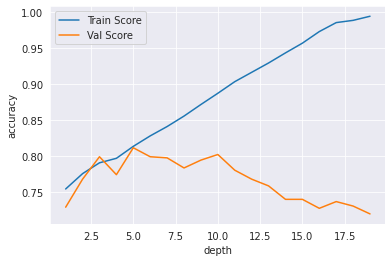

In [15]:
# подбор гиперпараметра максимальной глубины дерева для DecisionTreeClassifier

# шапка таблицы для построения графика
df_gr = pd.DataFrame(columns = ['depth', 'train', 'val'])

for depth in range(1, 20):
    
    # инициализация, обучение, предсказание модели на train и val выборках
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    pred_train = model.predict(features_train)
    
    # заполняем таблицу гиперпараметра и точности train и val
    df_gr.loc[depth, 'depth'] = depth
    df_gr.loc[depth, 'train'] = accuracy_score(target_train, pred_train)
    df_gr.loc[depth, 'val'] = accuracy_score(target_val, predictions)
    
    # выводим accuracy на каждом изменении гиперпараметра у train и val
    print('max_depth =', depth, ':', accuracy_score(target_train, pred_train),
          "  ", accuracy_score(target_val, predictions))

# строим график изменения accuracy у обучающего и валидационного набора    
sns.set_style('darkgrid')    
df_gr = df_gr.astype(float)
sns.lineplot(x="depth", y="train", data=df_gr, label="Train Score")
sns.lineplot(x="depth", y="val", data=df_gr, label="Val Score").set(ylabel='accuracy');

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Дерево решений исследовано корректно:
    
 - исследовано 10 значений гиперпараметров
 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Рекомендую посмотреть как при изменении гиперпараметров меняется точность на обучающем и валидационых наборах. Для этого с помощью print() выводи эти метрики на каждом шагу цикла. Также уместно использовать графики.
</div>

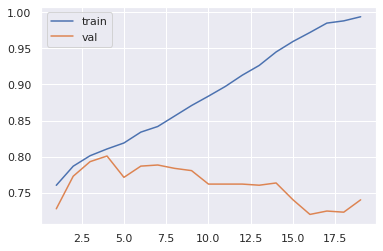

<div style="background: #e0eaf3; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='black'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='black'>Вывел на экран изменения точности у обучающей и валидационной. Также построил график здесь и далее везде. Кстати, а почему в практикуме проигнорировано рассмотрение метрик у обучающей? Точность на обучающей может не только идти в потолок, что вроде бы логично из-за обучения, но и падать (переобучение в процессе обучения?) </font>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> ответ ревьюера v2</b>

Привет!

Я показал тебе, что можно исследовать точность на обучающей выборки, и это уместно в текущем проекте, т.к. мы знакомимся с инструментарием (моделями МО и подбором гиперпараметров).
    
Но, то что уместно в этом проекте (иследование точности модели на обучающей выборке) выглядит неуместно в старших (более сложных) проектах. Все-таки наша цель - повышение точности на тестовой выборки и достигаем мы это с помощью выборки, похожей на неё (валидационной). 
    
Говоря о том, что точность "может не только идти в потолок из-за обучения" ты немного неправ. Это нейронные сети мы учим итерационно, и там может наступить момент, когда нужно остановиться, потому что всё что "потом" это лишнее.  А то же дерево решений мы учим за один проход. Просто есть модели сложные, есть попроще. Сложные могут видеть больше деталей, но склоннны к переобучению (больше запоминают,  чем обобщают).
    

    
</div>

min_samples_leaf = 2 : 0.8127593360995851    0.8102643856920684
min_samples_leaf = 3 : 0.8117219917012448    0.8087091757387247
min_samples_leaf = 4 : 0.8117219917012448    0.8087091757387247
min_samples_leaf = 5 : 0.8117219917012448    0.80248833592535
min_samples_leaf = 6 : 0.8112033195020747    0.80248833592535
min_samples_leaf = 7 : 0.8112033195020747    0.8040435458786936
min_samples_leaf = 8 : 0.8112033195020747    0.8040435458786936
min_samples_leaf = 9 : 0.8101659751037344    0.8040435458786936
min_samples_leaf = 10 : 0.8112033195020747    0.807153965785381
min_samples_leaf = 11 : 0.8101659751037344    0.807153965785381
min_samples_leaf = 12 : 0.8086099585062241    0.8040435458786936
min_samples_leaf = 13 : 0.8086099585062241    0.8040435458786936
min_samples_leaf = 14 : 0.8086099585062241    0.8040435458786936
min_samples_leaf = 15 : 0.8101659751037344    0.807153965785381
min_samples_leaf = 16 : 0.808091286307054    0.8087091757387247
min_samples_leaf = 17 : 0.807572614107883

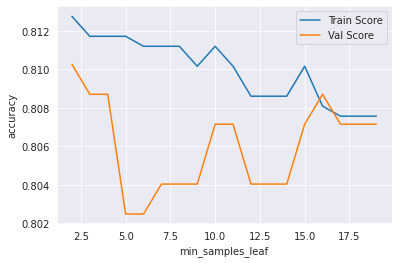

In [16]:
# подбор гиперпараметра минимального количества примеров для разделения у DecisionTreeClassifier

df_gr = pd.DataFrame(columns = ['min_samples_leaf', 'train', 'val'])

for leaf in range(2, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=5, min_samples_leaf=leaf)
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    pred_train = model.predict(features_train)
    
    df_gr.loc[leaf, 'min_samples_leaf'] = leaf
    df_gr.loc[leaf, 'train'] = accuracy_score(target_train, pred_train)
    df_gr.loc[leaf, 'val'] = accuracy_score(target_val, predictions)

    
    
    print('min_samples_leaf =', leaf, ':', accuracy_score(target_train, pred_train),  
          "  ", accuracy_score(target_val, predictions))
    
df_gr = df_gr.astype(float)
sns.lineplot(x="min_samples_leaf", y="train", data=df_gr, label="Train Score")
sns.lineplot(x="min_samples_leaf", y="val", data=df_gr, label="Val Score").set(ylabel='accuracy');

min_samples_split = 2 : 0.8127593360995851    0.8102643856920684
min_samples_split = 3 : 0.8127593360995851    0.8102643856920684
min_samples_split = 4 : 0.8127593360995851    0.8102643856920684
min_samples_split = 5 : 0.8127593360995851    0.8102643856920684
min_samples_split = 6 : 0.8117219917012448    0.807153965785381
min_samples_split = 7 : 0.8117219917012448    0.807153965785381
min_samples_split = 8 : 0.8117219917012448    0.807153965785381
min_samples_split = 9 : 0.8117219917012448    0.807153965785381
min_samples_split = 10 : 0.8117219917012448    0.807153965785381
min_samples_split = 11 : 0.8117219917012448    0.807153965785381
min_samples_split = 12 : 0.8117219917012448    0.807153965785381
min_samples_split = 13 : 0.8117219917012448    0.807153965785381
min_samples_split = 14 : 0.8117219917012448    0.807153965785381
min_samples_split = 15 : 0.8117219917012448    0.8040435458786936
min_samples_split = 16 : 0.8117219917012448    0.8040435458786936
min_samples_split = 17 : 0.

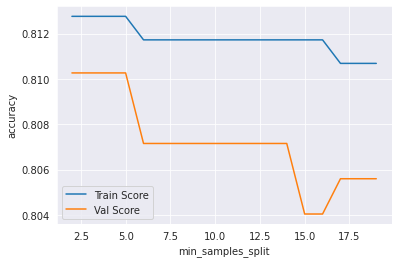

In [17]:
# подбор гиперпараметра минимального количества объектов для разделения у DecisionTreeClassifier

df_gr = pd.DataFrame(columns = ['min_samples_split', 'train', 'val'])

for split in range(2, 20):
    model = DecisionTreeClassifier(random_state=12345, max_depth=5, min_samples_leaf=2, min_samples_split=split)
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    pred_train = model.predict(features_train)
    
    df_gr.loc[split, 'min_samples_split'] = split
    df_gr.loc[split, 'train'] = accuracy_score(target_train, pred_train)
    df_gr.loc[split, 'val'] = accuracy_score(target_val, predictions)

    
    print('min_samples_split =', split, ':', accuracy_score(target_train, pred_train), 
          "  ", accuracy_score(target_val, predictions))
    
df_gr = df_gr.astype(float)
sns.lineplot(x="min_samples_split", y="train", data=df_gr, label="Train Score")
sns.lineplot(x="min_samples_split", y="val", data=df_gr, label="Val Score").set(ylabel='accuracy');

*Оптимальные гиперпараметры, при которых модель достигает максимальной `'accuracy rate`' и не переобучается, следующие:

    - max_depth - 5
    - min_samples_leaf - 2
    - min_samples_split - от 2-х до 5-ти
    
*Проверим, останутся ли они такими, если их задать все вместе, не по отдельности. Создадим тройной цикл, которые переберёт все комбинации гиперпараметров, записав лучшую модель с лучшими гипрепараметрами.*

In [18]:
# подбор гиперпараметров max_depth, min_samples_leaf, min_samples_split в комбинации друг с другом

best_model_tree = None
best_result = 0
best_depth = 0
best_leaf = 0
best_split = 0

for depth in tqdm(range(1, 11)):
    for leaf in range(2, 11):
        for split in range(2, 15):
            
            model = DecisionTreeClassifier(random_state=12345, max_depth=depth, 
                                           min_samples_leaf=leaf, min_samples_split=split) # инициализация модели
            model.fit(features_train, target_train) # обучение модели
            predictions = model.predict(features_val) # предсказание модели
            result = accuracy_score(target_val, predictions)  # подсчёт accuracy rate
            
            if result > best_result:
                best_model_tree = model
                best_result = result
                best_depth = depth
                best_leaf = leaf
                best_split = split
                
#вывод лучшей accuracy rate и лучших гиперпараметров

print("Лучшая accuracy_score: ", best_result)
print("Глубина дерева:", best_depth)
print('min_samples_leaf:', best_leaf)
print('min_samples_split:', best_split)

  0%|          | 0/10 [00:00<?, ?it/s]

Лучшая accuracy_score:  0.8102643856920684
Глубина дерева: 5
min_samples_leaf: 2
min_samples_split: 2


*Значения гиперпараметров не изменились, зафиксируем модель DecisionTreeClassifier c наивысшей `'accuracy rate`'.*

In [19]:
# обучение DecisionTreeClassifier с лучшими гиперпараметрами, вывод лучшей accuracy rate

best_model_tree = DecisionTreeClassifier(random_state=12345, max_depth=5, min_samples_leaf=2,
                               min_samples_split=2)
best_model_tree.fit(features_train, target_train)
predictions = best_model_tree.predict(features_val)
print(accuracy_score(target_val, predictions))

0.8102643856920684


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Молодец.. Потрачено немало усилий, но и результат получен неплохой.</div>

n_estimators = 10 : 0.9766597510373444    0.7931570762052877
n_estimators = 15 : 0.9891078838174274    0.7916018662519441
n_estimators = 20 : 0.9896265560165975    0.7993779160186625
n_estimators = 25 : 0.995850622406639    0.7978227060653188
n_estimators = 30 : 0.9953319502074689    0.7962674961119751
n_estimators = 35 : 0.9979253112033195    0.7962674961119751
n_estimators = 40 : 0.9984439834024896    0.7947122861586314
n_estimators = 45 : 0.9989626556016598    0.7962674961119751
n_estimators = 50 : 0.9994813278008299    0.8040435458786936
n_estimators = 55 : 0.9994813278008299    0.7993779160186625
n_estimators = 60 : 0.9994813278008299    0.7978227060653188
n_estimators = 65 : 0.9994813278008299    0.807153965785381
n_estimators = 70 : 1.0    0.8102643856920684
n_estimators = 75 : 1.0    0.8164852255054432
n_estimators = 80 : 1.0    0.8149300155520995
n_estimators = 85 : 1.0    0.8133748055987559
n_estimators = 90 : 1.0    0.8118195956454122
n_estimators = 95 : 1.0    0.81181959564

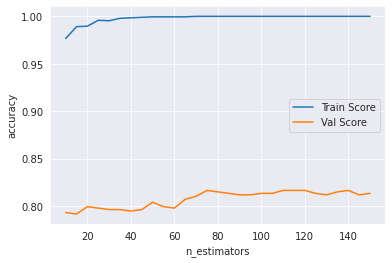

In [20]:
# подбор гиперпараметра количества деревьев для RandomForestClassifier

df_gr = pd.DataFrame(columns = ['n_estimators', 'train', 'val'])
count = 0

for est in range(10, 151, 5):
    count += 1
    model = RandomForestClassifier(random_state=12345, n_estimators=est)
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    pred_train = model.predict(features_train)
    
    df_gr.loc[count, 'n_estimators'] = est
    df_gr.loc[count, 'train'] = accuracy_score(target_train, pred_train)
    df_gr.loc[count, 'val'] = accuracy_score(target_val, predictions)

    
    print('n_estimators =', est, ':', accuracy_score(target_train, pred_train),
          "  ", accuracy_score(target_val, predictions))
    
df_gr = df_gr.astype(float)
sns.lineplot(x="n_estimators", y="train", data=df_gr, label="Train Score")
sns.lineplot(x="n_estimators", y="val", data=df_gr, label="Val Score").set(ylabel='accuracy');

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Случайный лес исследован корректно:
    
 - исследовано 28 значений гиперпараметров
 - модель обучена на обучающем наборе
 - получена оценка качества на валидационном наборе
 - перебор гиперпараметров осуществляется в цикле
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Рекомендую посмотреть как при изменении гиперпараметров меняется точность на обучающем и валидационых наборах. Для этого с помощью print() выводи эти метрики на каждом шагу цикла. Также уместно использовать графики.
</div>

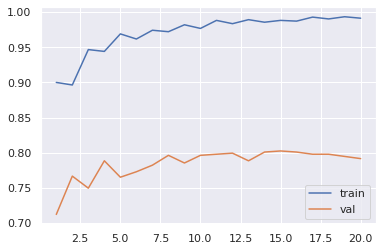

max_depth = 1 : 0.7401452282157677    0.7402799377916018
max_depth = 2 : 0.7826763485477178    0.7931570762052877
max_depth = 3 : 0.7992738589211619    0.8040435458786936
max_depth = 4 : 0.8060165975103735    0.8040435458786936
max_depth = 5 : 0.8200207468879668    0.8180404354587869
max_depth = 6 : 0.8428423236514523    0.8195956454121306
max_depth = 7 : 0.8594398340248963    0.8133748055987559
max_depth = 8 : 0.875    0.8087091757387247
max_depth = 9 : 0.8838174273858921    0.8118195956454122
max_depth = 10 : 0.8921161825726142    0.8118195956454122
max_depth = 11 : 0.9024896265560166    0.8164852255054432
max_depth = 12 : 0.9123443983402489    0.8164852255054432
max_depth = 13 : 0.9299792531120332    0.8087091757387247
max_depth = 14 : 0.9455394190871369    0.8102643856920684
max_depth = 15 : 0.9610995850622407    0.8102643856920684
max_depth = 16 : 0.9787344398340249    0.8118195956454122
max_depth = 17 : 0.9859958506224067    0.807153965785381
max_depth = 18 : 0.9953319502074689  

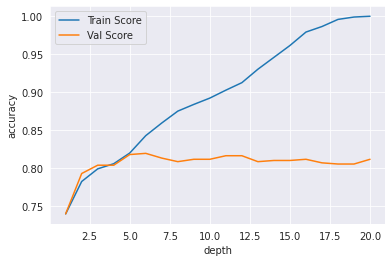

In [21]:
# подбор гиперпараметра максимальной глубины дерева для RandomForestClassifier

df_gr = pd.DataFrame(columns = ['depth', 'train', 'val'])

for depth in range(1, 21):
    model = RandomForestClassifier(random_state=12345, max_depth=depth)
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    pred_train = model.predict(features_train)
    
    df_gr.loc[depth, 'depth'] = depth
    df_gr.loc[depth, 'train'] = accuracy_score(target_train, pred_train)
    df_gr.loc[depth, 'val'] = accuracy_score(target_val, predictions)
    
    print('max_depth =', depth, ':', accuracy_score(target_train, pred_train),  
          "  ", accuracy_score(target_val, predictions))
    
df_gr = df_gr.astype(float)
sns.lineplot(x="depth", y="train", data=df_gr, label="Train Score")
sns.lineplot(x="depth", y="val", data=df_gr, label="Val Score").set(ylabel='accuracy');

In [22]:
# подбор гиперпараметров n_estimators и max_depth в комбинации друг с другом

best_model_forest = None
best_result = 0
best_est = 0
best_depth = 0
    
for est in tqdm(range(10, 151, 10)):
    for depth in range(1, 15):
            
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predictions = model.predict(features_val)
        result = accuracy_score(target_val, predictions)
            
        if result > best_result:
            best_model_forest = model
            best_result = result
            best_est = est
            best_depth = depth
                
print("Лучшая accuracy_score:", best_result)
print("Количество деревьев:", best_est)
print("Глубина дерева:", best_depth)

  0%|          | 0/15 [00:00<?, ?it/s]

Лучшая accuracy_score: 0.8227060653188181
Количество деревьев: 30
Глубина дерева: 12


*Для модели RandomForestClassifier лучшие значения гиперпараметров n_estimators и max_depth, если смотреть по отдельности, - 75 и 6 соответствеено. А вот в комбинации этих гиперпараметров оптимальные значения отличаются: 30 и 12 соответственно. И accuracy rate модели выше, чем если рассматривать по отдельности.*

*Исследуем для данной модели ещё два гиперпараметра: min_samples_leaf и min_samples_split.*

min_samples_leaf = 1 : 0.9139004149377593    0.8227060653188181
min_samples_leaf = 2 : 0.8973029045643154    0.8133748055987559
min_samples_leaf = 3 : 0.8910788381742739    0.8149300155520995
min_samples_leaf = 4 : 0.8744813278008299    0.8087091757387247
min_samples_leaf = 5 : 0.8651452282157677    0.8149300155520995
min_samples_leaf = 6 : 0.8532157676348547    0.8087091757387247
min_samples_leaf = 7 : 0.8495850622406639    0.8118195956454122
min_samples_leaf = 8 : 0.8454356846473029    0.8149300155520995
min_samples_leaf = 9 : 0.8386929460580913    0.8118195956454122
min_samples_leaf = 10 : 0.8319502074688797    0.8149300155520995
min_samples_leaf = 11 : 0.8309128630705395    0.8180404354587869
min_samples_leaf = 12 : 0.8278008298755186    0.8149300155520995
min_samples_leaf = 13 : 0.8215767634854771    0.8087091757387247
min_samples_leaf = 14 : 0.8179460580912863    0.8040435458786936
min_samples_leaf = 15 : 0.8163900414937759    0.8195956454121306
min_samples_leaf = 16 : 0.81846473

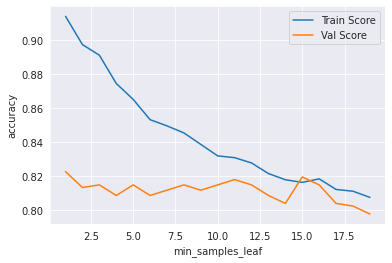

In [23]:
# подбор гиперпараметра min_samples_leaf у RandomForestClassifier при оптимальных гиперпараметрах деревьев

df_gr = pd.DataFrame(columns = ['min_samples_leaf', 'train', 'val'])

for leaf in range(1, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=30, max_depth=12, min_samples_leaf=leaf)
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    pred_train = model.predict(features_train)
    
    df_gr.loc[leaf, 'min_samples_leaf'] = leaf
    df_gr.loc[leaf, 'train'] = accuracy_score(target_train, pred_train)
    df_gr.loc[leaf, 'val'] = accuracy_score(target_val, predictions)

    
    print('min_samples_leaf =', leaf, ':', accuracy_score(target_train, pred_train), 
          "  ", accuracy_score(target_val, predictions))
    
df_gr = df_gr.astype(float)
sns.lineplot(x="min_samples_leaf", y="train", data=df_gr, label="Train Score")
sns.lineplot(x="min_samples_leaf", y="val", data=df_gr, label="Val Score").set(ylabel='accuracy');

*Оптимальное значение min_samples_leaf равно 1, но для полной картины лучше рассмотреть значение этого гиперпараметра в комбинации с n_estimators и max_depth.*

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>

В продолжение. За что отвечает гиперпараметр min_samples_leaf?  Это минимальное значеие элементов в листе. Это получается параметр, обратный глубине... Чем больше min_samples_leaf, тем менее глубокое дерево, тем меньше деталей оно может "различить"... </div>

**Код ниже закомментирован в целях экономии времени проверки ревьюером, время выполнения более 7 минут, результат выполнения под кодом!**

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Спасибо... 7 минут это еще не предел... В старших проектах часто переборы параметров могут длиться час и больше... Вот там точно не уместно оставлять только лучшие параметры. </div>

In [24]:
# подбор гиперпараметров n_estimators, max_depth, min_samples_leaf во всех вариантах

# best_model_forest = None
# best_result = 0
# best_est = 0
# best_depth = 0
# best_leaf = 0
    
# for est in tqdm(range(10, 151, 10)):
#     for depth in range(1, 15):
#         for leaf in range(1, 11):
            
#             model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, min_samples_leaf=leaf)
#             model.fit(features_train, target_train)
#             predictions = model.predict(features_val)
#             result = accuracy_score(target_val, predictions)
            
#             if result > best_result:
#                 best_model_forest = model
#                 best_result = result
#                 best_est = est
#                 best_depth = depth
#                 best_leaf = leaf
                
# print("Лучшая accuracy_score:", best_result)
# print("Количество деревьев:", best_est)
# print("Глубина дерева:", best_depth)
# print("min_samples_leaf:", best_leaf)

Результат выполнения кода:

Лучшая accuracy_score: 0.8258164852255054

Количество деревьев: 50

Глубина дерева: 8

min_samples_leaf: 10

*Таким образом, изменились 3 из 3-х гиперпараметров при рассмотрении всех вариантов вместе: n_estimators стало 50 вместо 30, max_depth изменился с 12 до 8, min_samples_leaf изменился с 1 до 10.*

*Посмотрим, влияет ли на значения этих гиперпараметров min_samples_split.*

min_samples_split = 2 : 0.8241701244813278    0.8258164852255054
min_samples_split = 3 : 0.8241701244813278    0.8258164852255054
min_samples_split = 4 : 0.8241701244813278    0.8258164852255054
min_samples_split = 5 : 0.8241701244813278    0.8258164852255054
min_samples_split = 6 : 0.8241701244813278    0.8258164852255054
min_samples_split = 7 : 0.8241701244813278    0.8258164852255054
min_samples_split = 8 : 0.8241701244813278    0.8258164852255054
min_samples_split = 9 : 0.8241701244813278    0.8258164852255054
min_samples_split = 10 : 0.8241701244813278    0.8258164852255054
min_samples_split = 11 : 0.8241701244813278    0.8258164852255054
min_samples_split = 12 : 0.8241701244813278    0.8258164852255054
min_samples_split = 13 : 0.8241701244813278    0.8258164852255054
min_samples_split = 14 : 0.8241701244813278    0.8258164852255054
min_samples_split = 15 : 0.8241701244813278    0.8258164852255054
min_samples_split = 16 : 0.8241701244813278    0.8258164852255054
min_samples_split 

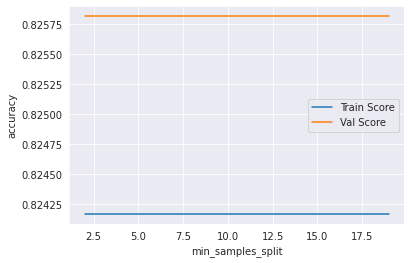

In [25]:
# подбор гиперпараметра min_samples_split у RandomForestClassifier при оптимальных других гиперпараметрах

df_gr = pd.DataFrame(columns = ['min_samples_split', 'train', 'val'])

for split in range(2, 20):
    model = RandomForestClassifier(random_state=12345, n_estimators=50, max_depth=8, min_samples_leaf=10, 
                                   min_samples_split=split)
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    pred_train = model.predict(features_train)
    
    df_gr.loc[split, 'min_samples_split'] = split
    df_gr.loc[split, 'train'] = accuracy_score(target_train, pred_train)
    df_gr.loc[split, 'val'] = accuracy_score(target_val, predictions)

    print('min_samples_split =', split, ':', accuracy_score(target_train, pred_train), 
          "  ", accuracy_score(target_val, predictions))
    
df_gr = df_gr.astype(float)
sns.lineplot(x="min_samples_split", y="train", data=df_gr, label="Train Score")
sns.lineplot(x="min_samples_split", y="val", data=df_gr, label="Val Score").set(ylabel='accuracy');

*Текущая accuracy rate при изменении min_samples_split не повышается, то есть этот гиперпараметр можно оставить по умолчанию 2 и не прописывать в гиперпараметрах. Был также выполнен следующий код ниже, комбинация всех рассмтриваемых гиперпараметров: все гиперпараметры изменились, accuracy стала ещё повыше. Код закомментирован, так как выполняется более часа. Результат выполнения прописан в текстовой ячейке.*

In [26]:
# подбор гиперпараметров n_estimators, max_depth, min_samples_leaf, min_samples_split во всех вариантах

# best_model_forest = None
# best_result = 0
# best_est = 0
# best_depth = 0
# best_leaf = 0
# best_split = 0
    
# for est in tqdm(range(10, 151, 10)):
#     for depth in range(1, 15):
#         for leaf in range(1, 11):
#             for split in range(2, 11):
            
#                 model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth, 
#                                                min_samples_leaf=leaf, min_samples_split=split)
#                 model.fit(features_train, target_train)
#                 predictions = model.predict(features_val)
#                 result = accuracy_score(target_val, predictions)
            
#                 if result > best_result:
#                     best_model_forest = model
#                     best_result = result
#                     best_est = est
#                     best_depth = depth
#                     best_leaf = leaf
#                     best_split = split
                
# print("Лучшая accuracy_score:", best_result)
# print("Количество деревьев:", best_est)
# print("Глубина дерева:", best_depth)
# print("min_samples_leaf:", best_leaf)
# print("min_samples_split:", best_split)

Лучшая accuracy_score: 0.8273716951788491

Количество деревьев: 20

Глубина дерева: 14

min_samples_leaf: 2

min_samples_split: 10

*Зафиксируем модель RandomForestClassifier c наивысшей `'accuracy rate`'.*

In [27]:
# обучение RandomForestClassifier с лучшими гиперпараметрами, вывод лучшей accuracy rate

best_model_forest = RandomForestClassifier(random_state=12345, n_estimators=20, max_depth=14,
                                          min_samples_leaf=2 ,min_samples_split=10)
best_model_forest.fit(features_train, target_train)
predictions = best_model_forest.predict(features_val)
print(accuracy_score(target_val, predictions))

0.8273716951788491


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Результатом проведенного исследования получена хорошая точность.

Ты выполнил большую работу по подбору разных гиперпараметров. В принципе, в sklearn есть инструменты для автоматического подбора лучших гиперпараметров (GridSearch и RandomSearch)  Нужно понимать, что эти инструменты имеют свои сильные и слабые места, поэтому важно не только научиться применять его с точки зрения кода, но и понимать как он работает внутри (как минимум хорошо понять что такое кросс-валидация) явно представлять себе ограничения на применение. Так, например, в следующем проекте очень сложно правильно применить поиск по сетке.
    
Но в любом случае оставлю тебе ссылки для ознакомления.
    
https://ml-handbook.ru/chapters/hyperparameters_tuning/intro
    
https://newtechaudit.ru/gridsearchcv-pomoshhnik-v-vybore/
    
    
А вот эта статья поможет тебе не совершить "детские ошибки" в следующем проекте, если ты вдруг решишь использовтаь поиск по сетке для подбора гиперпараметров
    
https://datascience.xyz/practice/kak-delat-kross-validaciju-pri-apsemplinge-dannyh.html
    
    

</div>

<div style="background: #e0eaf3; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='black'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='black'>Спасибо, ознакомился. Как понимаю, перебор по циклам - частный случай GridSearch. </font>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> ответ ревьюера v2</b>

Близко, но не совсем. Главная фишка GridSearchCV - отсутствие отдельной валидационной выборки и использование кросс-валидации.  Поэтому работает дольше, но в теории точнее. Есть свои бонусы (автоматически сохраняет лучшую модель, переобучает её на всем датасете, список параметров для перебора можно передать словарем... Но и шансов ошибиться тоже много.</div>

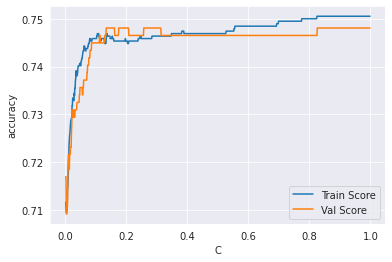

In [28]:
# подбор гиперпараметра C для LogisticRegression в диапазоне от 0.0001 до 1

df_gr = pd.DataFrame(columns = ['C', 'train', 'val'])

for c in range(1, 1000):
    model = LogisticRegression(random_state=12345, solver='liblinear', C=c/1000, tol=1e-8)
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    pred_train = model.predict(features_train)
    
    df_gr.loc[c, 'C'] = c/1000
    df_gr.loc[c, 'train'] = accuracy_score(target_train, pred_train)
    df_gr.loc[c, 'val'] = accuracy_score(target_val, predictions)

    
df_gr = df_gr.astype(float)
sns.lineplot(x="C", y="train", data=df_gr, label="Train Score")
sns.lineplot(x="C", y="val", data=df_gr, label="Val Score").set(ylabel='accuracy');

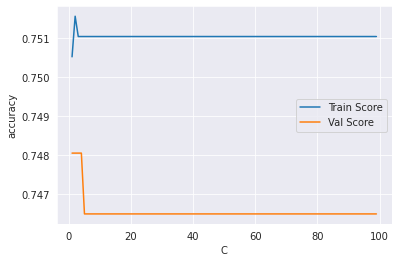

In [29]:
# подбор гиперпараметра C для LogisticRegression от 1 до 100

df_gr = pd.DataFrame(columns = ['C', 'train', 'val'])

for c in range(1, 100):
    model = LogisticRegression(random_state=12345, solver='liblinear', C=c, tol=1e-8)
    model.fit(features_train, target_train)
    predictions = model.predict(features_val)
    pred_train = model.predict(features_train)
    
    df_gr.loc[c, 'C'] = c
    df_gr.loc[c, 'train'] = accuracy_score(target_train, pred_train)
    df_gr.loc[c, 'val'] = accuracy_score(target_val, predictions)

    
df_gr = df_gr.astype(float)
sns.lineplot(x="C", y="train", data=df_gr, label="Train Score")
sns.lineplot(x="C", y="val", data=df_gr, label="Val Score").set(ylabel='accuracy');

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Логистическая регрессия исследована корректно.
</div>


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Логистическая регрессия - это поиск гиперплоскости, который сводится к выбору нескольких коэффициентов (количество признаков + 1). Эта задача решается итерационо, но алгоритм сходится за первую сотню итерций, поэтому везде где больше 100, это тот же самый алгоритм. Попробуй использовать другой гиперпараметр - C, он отвечает за регуряризацию и часто помогает улучшить решение, т.к. при его испльзовании меняется оптимизируемая функция.
</div>

<div style="background: #e0eaf3; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='black'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='black'>Поисследовал С, не сильно улучшает точность. </font>
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера v2</b>
Не забывай про этот гиперпараметр, есть задачи где он хорошо вытаскивает логистическую регрессию.

А C лучше подбирать не линейно, а с помощью np.logspace... исследуя и маленькие и большие значения, а не просто перебором по целым числам.

</div>

*Можно оставить по умолчанию значение максимального числа итераций, здесь значение гиперпараметра tol, отличное от дефолтного, немного повышает точность модели. Также оптимально выбрать гиперпараметр solver как 'liblinear'. Исследован гиперпараметр С, оптимальные значения около 0.2.*

*Зафиксируем оптимальные гиперпараметры для LogisticRegression*

In [30]:
# обучение LogisticRegression с лучшими гиперпараметрами, вывод лучшей accuracy rate

best_model_reg = LogisticRegression(random_state=12345, solver='liblinear', C=0.2, tol=1e-8)
best_model_reg.fit(features_train, target_train)
predictions = best_model_reg.predict(features_val)
print(accuracy_score(target_val, predictions))

0.7480559875583204


### Вывод к третьему разделу <a name="subparagraph3"></a>

*Были обучены с подбором гиперпараметров (на тренировочной выборке) и проверены на accuracy rate (на валидационной выборке) следующие типы моделей:*

    - модель дерева решений (DecisionTreeClassifier)
    - модель случайного леса (RandomForestClassifier)
    - модель логистической регрессии (LogisticRegression)
    
**Модель дерева решений (DecisionTreeClassifier)**

*Подобраны следующие оптимальные гиперпараметры: максимальная глубина дерева (max_depth) - 5, минимальное количество примеров для разделения (min_samples_leaf) - 2, минимальное количество объектов для разделения (min_samples_split) - 2. Удалось достичь accuracy rate - 0.810.*


**Модель случайного леса (RandomForestClassifier)**

*Подобраны следующие оптимальные гиперпараметры: количество деревьев (n_estimators) - 20, max_depth - 14, min_samples_leaf - 2, min_samples_split - 10. Удалось достичь accuracy rate - 0.827.*

**Модель логистической регрессии (LogisticRegression)**

*Подобраны следующие оптимальные гиперпараметры: C(регуляризация) - 0.2, допуск (tol) - 1e-8, алгоритм solver - 'liblinear'. Удалось достичь accuracy rate - 0.748.*

*Таким образом, самая оптимальная модель по проверке на валидационной выборке -**RandomForestClassifier** c accuracy rate 0.827.*


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец, есть выводы, и выбрана лучшая модель, включая гиперпараметры!
</div>


## Проверьте модель на тестовой выборке<a name="paragraph4"></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
К данному этапу лучше подходить с одной выбранной моделью (ты это сделал). Чтобы избежать искушения вдруг "поменять" модель по  результатам тестирования. Ведь любое использование тестовой выборки для улучшения модели (в том числе выбор лучшей модели) - это нарушение.</div>

<div style="background: #e0eaf3; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='black'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='black'>Понятно. Тестирую одну выбранную модель. </font>
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> 👍 </div>

In [31]:
# тестовая выборка (признаки и целевой признак)

display(features_test)
display(target_test)

,calls,minutes,messages,mb_used
78,73,562.27,11,17589.08
2024,27,147.66,39,7545.04
2907,164,1132.94,16,5998.50
680,126,848.92,57,19967.05
3078,13,60.13,22,29289.67
...,...,...,...,...
1554,82,618.35,56,19343.02
2018,62,468.96,10,28630.32
2981,57,317.27,27,13716.00
1391,35,202.92,25,12603.80


78      0
2024    0
2907    1
680     0
3078    1
       ..
1554    0
2018    0
2981    0
1391    0
2434    0
Name: is_ultra, Length: 643, dtype: int64

*Проверим лучшую модель **RandomForestClassifier** с лучшими гиперпараметрами на тестовой выборке. Для этого ещё раз обучим эту модель на общем наборе тренировочной плюс валидационной выборок для оптимального результата.*

In [32]:
# обучение лучшей модели случайного леса и вывод accuracy rate на тестовой выборке

best_model_forest.fit(pd.concat([features_train, features_val]), pd.concat([target_train, target_val]))
predictions = best_model_forest.predict(features_test)
print(accuracy_score(target_test, predictions))

0.8273716951788491


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец: 
    
  - выбрана лучшая модель
  - тестирование произведено корректно 
  - достигнута хорошая точность на тестовой выборке
    
Молодец, что для финальной модели использовал валидационую выборку вместе с обучающей для обучения модели.
</div>


### Вывод к четвертому разделу <a name="subparagraph4"></a>

*После обучения лучшей модели случайного леса (RandomForestClassifier) на большом объёме данных тренировочной и валидационных выборок, была получена доля правильных ответов accuracy rate на тестовой выборке в размере 0.827.*

## (бонус) Проверьте модели на адекватность<a name="paragraph5"></a>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Адекватность модели - это её способность превзойти примитивный "безйлайн". На нашей выборке самым "точным" бейзлайном является предскзаание 0, эта модель дает 70% точность.
Вычислить это можно вручную или используя DummyClassifier.
    
Если точность нашей модели выше, чем точность Dummy-модели, то мы говорим что модель адекватна.
</div>

<div style="background: #e0eaf3; padding: 5px; border: 1px solid SteelBlue; border-radius: 5px;">
    <font color='black'><u><b>КОММЕНТАРИЙ СТУДЕНТА</b></u></font>
    <br />
    <font color='black'>Посчитал точность и по DummyClassifier тоже. Тут кстати, имеет значение в пирнципе, для Dummy брать всю выборку изначальную, или можно ограничиться любой имеющейся выборкой? </font>
</div>

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
<b>v2</b> Скорее всего не принципиально, но я бы рекомендовал сделать "честно", как и везде. Обучить по обучающей выборке, а сделать предсказание по тестовой )) Просто пусть это будет "шаблоном" и всегда, когда не понятно - обучайся на обучающей ))) потому что если ошибешься, то цена ошибки слишком велика.</div>

In [33]:
# посчитаем точность модели по DummyClassifier, если взять самый часто встречающийся класс

dummy_model = DummyClassifier(strategy="most_frequent", random_state=12345)
dummy_model.fit(features, target)
prediction_dummy = dummy_model.predict(features)
print(dummy_model.score(features, target))

0.693528313627878


*У нашей модели точность 0.83, что выше, чем если сформируем предсказание из самого часто встречающегося класса (0.69). Поэтому наша модель адекватна.*

*Посмотрим также на точность модели, если сформируем набор данных значений классов, взятых случайным образом с вероятностью 50%: либо 1, либо 0. Сравним его с полученным лучшим значением модели RandomForestClassifier (0.83).*

In [34]:
# проведём 1000 экспериментов выявления целевого признака случайным образом, запишем все accuracy_rate в список

n = 1000 # число экспериментов
accuracy_random = [] # список для всех случайных accuracy rate

for _ in range(n):
    
    # подбрасываем "монетку" в эксперименте для определения 1 или 0 столько раз, сколько объектов в тестовой выборке
    target_random = [np.random.binomial(1, 0.5) for i in range(len(target_test))]
    
    # определяем accuracy rate эксперимента и тестовой выборки
    result_random = accuracy_score(target_test, target_random)
    
    # все accuracy rate в список
    accuracy_random.append(result_random)
    
# выведем первые 10 accuracy rate    
accuracy_random[:10]

[0.48367029548989116,
 0.48989113530326595,
 0.5147744945567652,
 0.49922239502332816,
 0.5178849144634525,
 0.49922239502332816,
 0.5023328149300156,
 0.48367029548989116,
 0.505443234836703,
 0.49300155520995337]

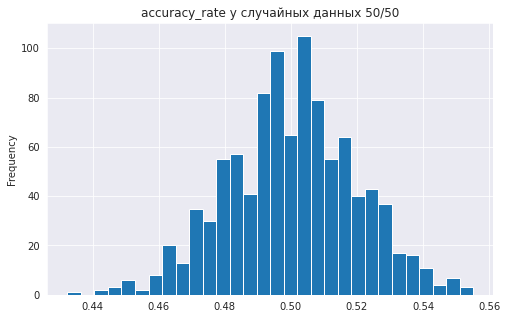

In [35]:
# гистограмма всех 1000 accuracy rate
pd.Series(accuracy_random).plot(kind='hist', bins=30, 
                                title='accuracy_rate у случайных данных 50/50', figsize=(8, 5));

In [36]:
# accuracy rate среднее, минимальное, максимальное
pd.Series(accuracy_random).describe()

count    1000.000000
mean        0.500342
std         0.019734
min         0.432348
25%         0.487947
50%         0.500778
75%         0.513219
max         0.555210
dtype: float64

*Таким образом, если модель сформируем случайным образом, то её минимальная accuracy rate в 1000 экспериментах около 0.45, максимальная - около 0.55, средняя - около 0.5. Эти данные весьма далеки от полученной accuracy rate в результате создания RandomForestClassifier с accuracy rate 0.8. Модель создавать имеет смысл.*

In [37]:
# посмотрим на доли значений целевого признака в тестовой выборке
target_test.value_counts(normalize=True)

0    0.693624
1    0.306376
Name: is_ultra, dtype: float64

In [38]:
# посчитаем accuracy rate, если в целевой признак будем всегда записывать 0.

target_0 = [0 for i in range(len(target_test))]
accuracy_score(target_test, target_0)

0.6936236391912908

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Молодец,  оценена точность константной модели.
</div>


*Accuracy rate, если в целевой признак записывать какое-то одно значение, будет равна доле этого значения признака в исходных данных. То есть модель не имеет смысла создавать, если очень много значений какого-то одного признака, а других мало. В нашем случае модель имеет смысл.*

*Логично предположить, что если формировать модель из целевых признаков не 50/50, а вероятность взять в соответствии с долей значений, то accuracy rate может приблизиться к той, что в модели RandomForestClassifier.*

*Сформируем 1000 выборок, где в каждом объекте 1 выпадает с вероятностью в 30%. Посчитаем их accuracy rate.* 

In [39]:
# проведём 1000 экспериментов выявления целевого признака с вероятностью 1 в 30%, а 0 - в 70%.

n = 1000
accuracy_random_2 = []

for _ in range(n):
    target_random_2 = [np.random.binomial(1, 0.3) for i in range(len(target_test))]
    result_random_2 = accuracy_score(target_test, target_random_2)
    accuracy_random_2.append(result_random_2)
    
    
accuracy_random_2[:10]

[0.5738724727838258,
 0.5552099533437014,
 0.5598755832037325,
 0.6003110419906688,
 0.5614307931570762,
 0.5800933125972006,
 0.5987558320373251,
 0.5505443234836703,
 0.5878693623639192,
 0.5614307931570762]

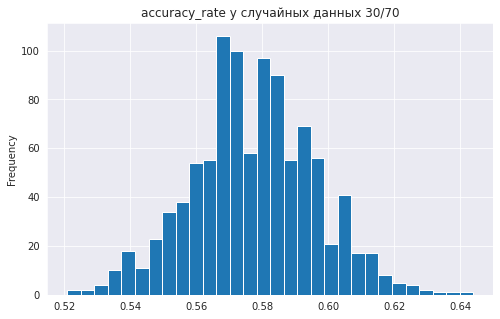

In [40]:
# гистограмма всех 1000 accuracy rate
pd.Series(accuracy_random_2).plot(kind='hist', bins=30, 
                                title='accuracy_rate у случайных данных 30/70', figsize=(8, 5));

In [41]:
# accuracy rate среднее, минимальное, максимальное
pd.Series(accuracy_random_2).describe()

count    1000.000000
mean        0.577316
std         0.018818
min         0.520995
25%         0.564541
50%         0.576983
75%         0.589425
max         0.643857
dtype: float64

*Средняя accuracy rate при выборе 1 в 30% не намного выше, чем если вероятность 50/50 (около 0.58 против около 0.5). Даже максимальное значение accuracy rate около 0.6 далеко от accuracy rate в результате создания RandomForestClassifier с accuracy rate в 0.8.*

### Вывод к пятому разделу <a name="subparagraph5"></a>

*Проверка модели на адекватность заключалась в формировании некоей другой модели, но каким-то простым образом, и сравнение accuracy rate этой простой модели с accuracy rate 0.8 модели RandomForestClassifier.*

*Простая модель формировалась следующими тремя способами:*

    - значения целевого признака генерировались с вероятностью 50/50
    - взято только одно значение целевого признака с заполнением им всех объектов
    - значения целевого признака генерировались с вероятностью 30/70 (по доле значений целевого признака в тестовой выборке)
    
    
**Генерирование значений 1 и 0 с вероятностью 50/50**

*Accuracy rate такой модели около 0.5*


**Заполнение значением 0 всех объектов**

*Accuracy rate такой модели равно доле значений 0 в тестовой выборке, в нашем случае 0.7**


**Генерирование значений 1 и 0 с вероятностью 30/70 (по доле значений целевого признака в тестовой выборке)**

*Accuracy rate такой модели около 0.58*

*Таким образом accuracy rate 0.802 созданной модели **RandomForestClassifier** гораздо выше accuracy rate моделей, созданных простым способом, что говорит о её адекватности и пользе.*

## Общий вывод <a name="paragraph6"></a>

*Целью исследования являлось построение модели для задачи классификации, которая выбирала бы тариф "Смарт" или "Ультра" по данным звонков, сообщений и траффика с мобильных телефонов абонентов сети сотовой связи. Необходимая доля правильных ответов модели (accuracy rate) - не менее 75%. Для реализации данной цели были решены следующие задачи:*

 1. **Изучение общей информации о данных**
 
 
 2. **Разбивка данных на выборки**
 
 
 3. **Исследование моделей**
 
      
 4. **Проверка моделей на тестовой выборке**
 
 
 5. **Проверка лучшей модели на адекватность**
 
 
 
 **Задача 1 "Изучение общей информации о данных"** 


*В базе данных выявлена информация о о количестве звонков за определённый период, их суммарной продолжительности, количестве sms-сообщений и использованного интернет-траффика по 3214 абонентам. Также указан тип тарифа, на который перешёл абонент и который надо порекомендовать клиенту, ещё не перешедшему на "Смарт" или "Ультра" тарифы. Данные полные, пропусков нет.*



**Задача 2 "Разбивка данных на выборки"** 


*Для построения и последующей проверки моделей все абоненты случайным образом разбиты на 3 выборки: тренировочная (60% данных), валидационная (20%) и тестовая(20%).*


**Задача 3 "Исследование моделей"** 


*Были подобраны гиперпараметры и посчитана доля правильных ответов (accuracy rate) по 3-м основным моделям классификации: модели дерева решений (DecisionTreeClassifier), модели случайного леса (RandomForestClassifier) и модели логистической регрессии (LogisticRegression). Удалось достичь следующей доли правильных ответов (accuracy rate):*

    - 0.810 для DecisionTreeClassifier
    - 0.827 для RandomForestClassifier
    - 0.748 для LogisticRegression

*Самая оптимальная модель по данным валидационной выборки - модель случайного леса (RandomForestClassifier) с accuracy rate 0.827.*


**Задача 4 "Проверка моделей на тестовой выборке"** 


*По проверке модели случайного леса (RandomForestClassifier) на тестовой выборке доля правильных ответов (accuracy rate) также составляет 0.827.*


**Задача 5 "Проверка лучшей модели на адекватность"** 


*Модель RandomForestClassifier c долей правильных ответов (accuracy rate) 0.827 соотнесена с accuracy rate разных моделей, созданных каким-то простым методом. В результате accuracy rate простых моделей гораздо меньше accuracy rate лучшей модели, созданной с применением гиперпараметров. Среди простых моделей использовались генерация значений целевого признака (тарифов) с вероятностью 50/50, заполнение признака каким-то одним значением, генерация значений целевого признака с вероятностью соотношения доли значений целевого признака на тестовой выборке.*

*В целом, объём базы данных и состав признаков позволил выполнить задачу в построении модели предсказания тарифа для нового абонента с долей правильных ответов не менее 75%.*
 

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75


<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

В целом мне все понравилось: твоя работа выполнена на хорошем уровне с минимальными помарками.
Также работа выглядит аккуратной и хорошо оформленной.
Хорошее оформление, очень подробные выводы.
Вижу, что тебе дается python, и инструментарий машинного обучения.
 
У меня нет критичных замечаний к твоей работе. Проект может быть принят уже сейчас. Возвращаю проект чтобы дать тебе возможность ознакомиться с моими комментариями, возможно у тебя возникнет желание задать вопросы или внести корректировки в проект.
     
Жду твой проект на финальное ревью :)
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий v2</b>

Проект принят. Поздравляю и желаю дальнейших успехов!</div>